# Exercise 1 - Numpy

In [3]:
import numpy as np

## task 1

In [4]:
mat1 = np.ones((3, 4))
mat2 = np.zeros((3, 2))

In [5]:
np.hstack((mat1, mat2))


array([[1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0.]])

## task 2

In [6]:
M = np.arange(30).reshape((5, 6))
a = np.array([2, 4, 0, 3, 2])
b = np.array([1, 0, 5, 3, 4])

In [7]:
print(M)
print("Answer:")
print(M[a, b])

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]
Answer:
[13 24  5 21 16]


## task 3

In [8]:
M = np.arange(25).reshape((5, 5))

In [9]:
print(M)
print("Trace = ", np.trace(M))
print("Count of nonzero elements = ", np.count_nonzero(np.diag(M)))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
Trace =  60
Count of nonzero elements =  4


## task 4

In [10]:
rg = np.random.default_rng(1)
T = np.floor(10 * rg.random((3, 4, 5, 5))).astype(int)

In [11]:
np.unique(T, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([31, 33, 32, 31, 26, 26, 34, 31, 28, 28], dtype=int64))

## task 5

In [12]:
First = np.floor(10 * rg.random((4, 6)) - 5)
Second = np.floor(10 * rg.random((4, 6)) - 5)

In [13]:
print(First)
Second[First<0] = 0
print(Second)

[[-3.  0.  0. -1. -1.  0.]
 [ 4. -1.  3. -5. -2.  0.]
 [ 1. -3. -2.  4.  1.  0.]
 [-5. -5. -3. -4.  4. -5.]]
[[ 0. -5.  1.  0.  0. -5.]
 [-3.  0.  3.  0.  0.  3.]
 [ 2.  0.  0.  3. -4.  1.]
 [ 0.  0.  0.  0. -1.  0.]]


## task 6

In [14]:
M = np.arange(25).reshape((5, 5)).astype(float)
M[:, 3] = 0
M

array([[ 0.,  1.,  2.,  0.,  4.],
       [ 5.,  6.,  7.,  0.,  9.],
       [10., 11., 12.,  0., 14.],
       [15., 16., 17.,  0., 19.],
       [20., 21., 22.,  0., 24.]])

In [15]:
M -= np.mean(M, axis=0)
norms = np.linalg.norm(M, axis=0)
norms[norms==0] = 1
M /= norms
print(M)

[[-0.63245553 -0.63245553 -0.63245553  0.         -0.63245553]
 [-0.31622777 -0.31622777 -0.31622777  0.         -0.31622777]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.31622777  0.31622777  0.31622777  0.          0.31622777]
 [ 0.63245553  0.63245553  0.63245553  0.          0.63245553]]


## task 7

In [16]:
M1 = np.floor(10 * rg.random((4, 6)) - 5).astype(int)
M2 = np.floor(10 * rg.random((4, 4)) - 5).astype(int)
print(M1)
print(M2)

[[-3  2 -3  4  0 -2]
 [-4 -1 -2  1 -1 -5]
 [ 3 -5  3  3  4  1]
 [-4 -1 -1  1 -2  1]]
[[-3 -2  0 -1]
 [-4  4  1  3]
 [-2  4  3  4]
 [-4 -1 -2  1]]


In [20]:
M = np.tensordot(M1, M2, axes=([0,0]))
print(M)

[[ 35   6  13  -1]
 [ 12 -27 -14 -26]
 [ 15  11   9   8]
 [-26   7   8  12]
 [  4  14  15  11]
 [ 20 -13  -4  -8]]


## task 8

In [37]:
import time

def get_np_time(N, repeat=100):
    M = np.random.random((N, N))
    tm = time.time();
    for i in range(repeat):
        prod = M @ M
    tm = time.time() - tm;
    return tm/repeat*1000

def product(A, N):
    res = np.empty((N, N))
    for i in range(N):
        for j in range(N):
            res[i, j] = 0
            for k in range(N):
                res[i, j] += A[i, k] * A[k, j]
    return res

def get_py_time(N, repeat=100):
    M = np.random.random((N, N))
    tm = time.time();
    for i in range(repeat):
        prod = product(M, N)
    tm = time.time() - tm;
    return tm/repeat*1000

In [41]:
ns_np = np.arange(2, 1003, 10)
ns_py = np.arange(2, 153, 10)
np_times = np.array([get_np_time(i) for i in ns_np])
py_times = np.array([get_py_time(i, 10) for i in ns_py])

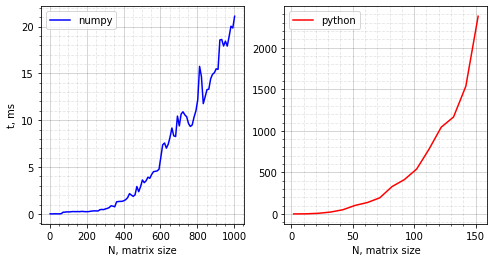

In [42]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(ns_np, np_times, color="b", label="numpy")
axs[0].set_xlabel("N, matrix size")
axs[0].set_ylabel("t, ms")

axs[1].plot(ns_py, py_times, color="r", label="python")
axs[1].set_xlabel("N, matrix size")

axs[0].minorticks_on()
axs[0].grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
axs[0].grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
axs[0].legend()
axs[1].minorticks_on()
axs[1].grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
axs[1].grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
axs[1].legend()
plt.show()

Ассимптотика та же, в то время как константа разительно отличается